# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

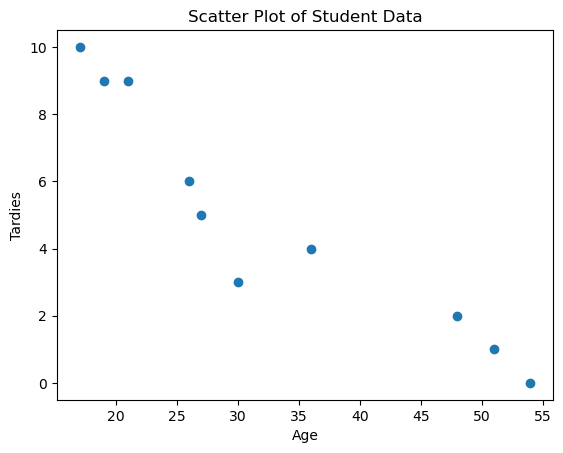

In [3]:
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.title('Scatter Plot of Student Data')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# There is a clear negative correlation between age Tardies and Age.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Calculate covariance
covariance_matrix = student_data[['Age', 'Tardies']].cov()

# Calculate correlation
correlation_matrix = student_data[['Age', 'Tardies']].corr()

# Print covariance and correlation matrices
print("Covariance Matrix:")
print(covariance_matrix)

print("\nCorrelation Matrix:")
print(correlation_matrix)

Covariance Matrix:
                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444

Correlation Matrix:
              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


- Covariance is a measure of how much two variables change together. 
- Correlation is a standardized measure of the strength and direction of the linear relationship between two variables.

In summary, the negative correlation suggests a strong linear relationship between X and Y, with one variable tending to decrease as the other increases. The magnitude of the correlation coefficient (-0.94) indicates a very strong negative linear relationship.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
from sklearn.model_selection import train_test_split as tts
import statsmodels.api as sm

In [7]:
x = sm.add_constant(student_data['Age']) # adds a constant term to the predictor variable
y = student_data.Tardies # Define the outcome variable

model = sm.OLS(y, x).fit() # Create an ordinary least squares (OLS) model
y_pred=model.predict(x)

model.summary()

c:\Users\borja\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           5.57e-05
Time:                        15:45:46   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

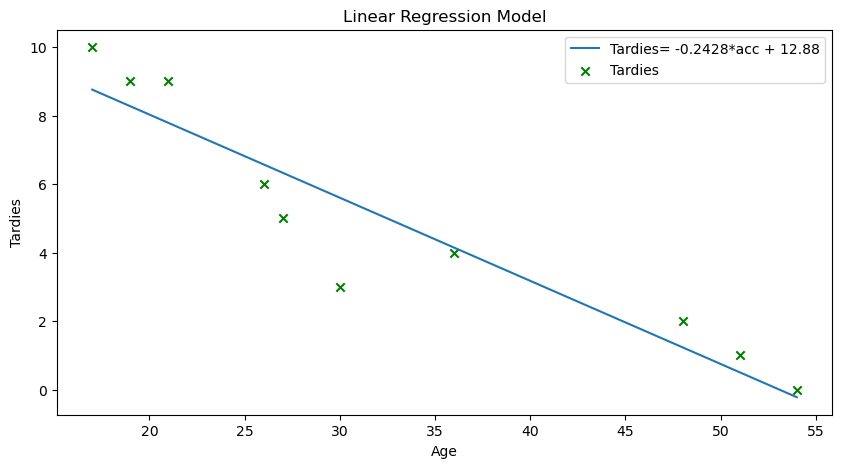

In [8]:
x=np.linspace(student_data['Age'].min(), student_data['Age'].max(), 50)

y=-0.2428*x + 12.8888   # y = mx + b

plt.figure(figsize=(10, 5))

# The line
plt.plot(x, y, label='Tardies= -0.2428*acc + 12.88')

# The data for the scatter plot
plt.scatter(student_data['Age'], student_data['Tardies'], marker='x', c='g', label='Tardies')


plt.title('Linear Regression Model')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [9]:
'''
The model adjusts pretty well, with a R-Squared value of 0.88.
Our p-value is 0.000 which means that Age DOES influence tardies.
the F-statistic is 59.81 which means there IS a significant relationship between age and tardies.
'''

'\nThe model adjusts pretty well, with a R-Squared value of 0.88.\nOur p-value is 0.000 which means that Age DOES influence tardies.\nthe F-statistic is 59.81 which means there IS a significant relationship between age and tardies.\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [10]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [11]:
data = pd.read_csv('vehicles.csv')
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


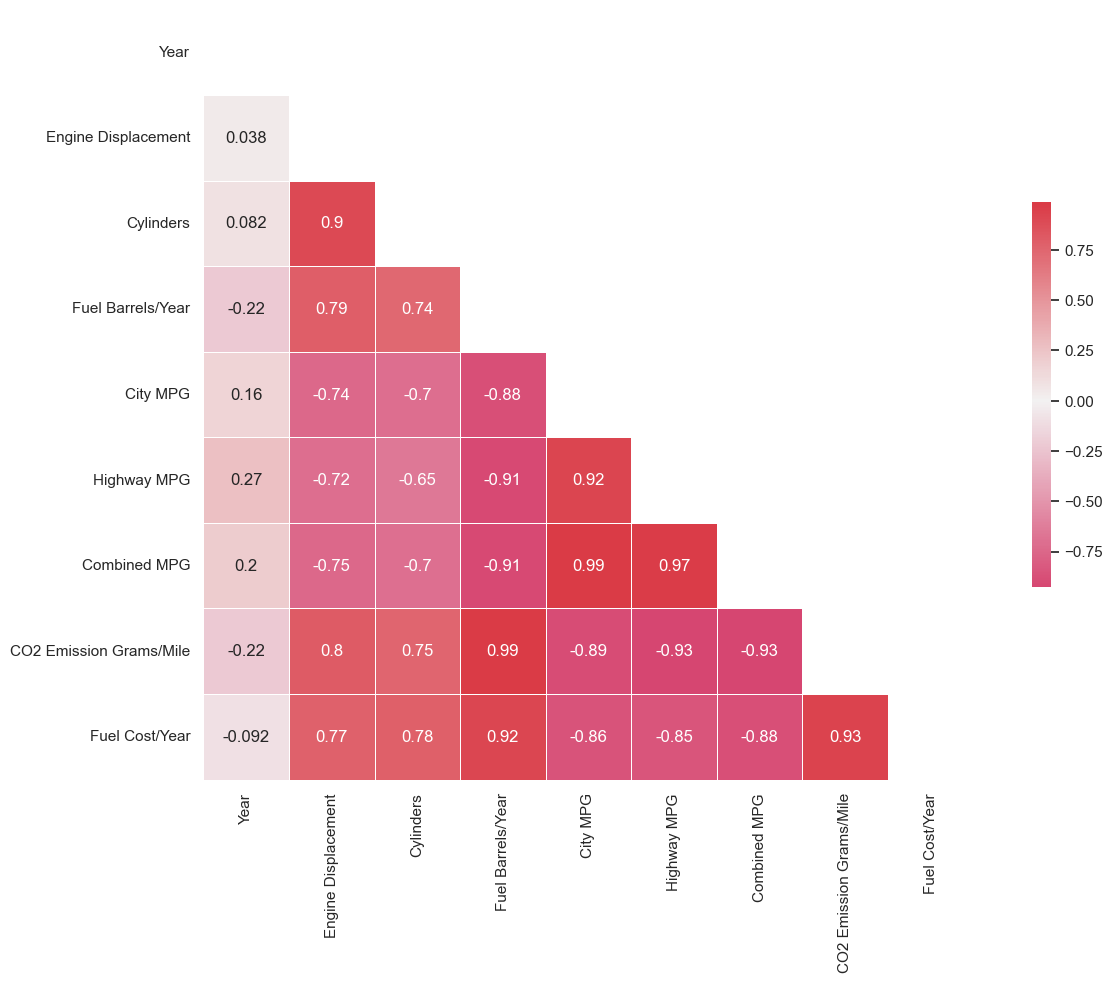

In [12]:
plt.figure(figsize=(15, 10))   # 150x100 pixeles

sns.set(style='white')    # estilo blanco

mask=np.triu(np.ones_like(data.corr(), dtype=bool))    # mascara para tapar lo de arriba

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de  colores


sns.heatmap(data.corr(),    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [13]:
columns = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
correlation_matrix = data[columns].corr()

correlation_matrix

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


We can point out several insights:
- The highest correlation we can point out is 'Fuel Barrels/Year' with 'C02 Emission Grams/Mile' `0.986`
- 'Fuel Barrels/Year' and 'Cylinders' also present a strong xcorrelation of `0.739`

La variable 'Fuel Barrels/Year' tiene la correlación más alta (0.99) con 'CO2 Emission Grams/Mile'. 
Esto sugiere que la cantidad de barriles de combustible consumidos por año tiene una fuerte relación positiva con las emisiones 
de CO2. 
Por otro lado, 'Year' tiene la correlación más baja (-0.222) entre estas variables, lo que indica que el año del 
vehículo tiene la relación más débil con las emisiones de CO2 entre estas variables.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [14]:
x=sm.add_constant(data[[
    'Year',
    'Cylinders',
    'Fuel Barrels/Year',
    'Combined MPG',
    'Fuel Cost/Year', 
]].apply(lambda x: x.fillna(x.mean()))

)
y=data['CO2 Emission Grams/Mile']

model=sm.OLS(y, x).fit()
y_pred=model.predict(x)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                             15:45:47   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
''''
In summary, this model has a high R-squared value and significant F-statistic and coefficients, 
suggesting that it is capable of predicting CO2 emissions well based on the considered independent variables. 
Additionally, for the variables, we have a p-value of 0.000, indicating that they do influence CO2 emissions. 
The most important variable is Fuel Barrels/Year.
'''

"'\nIn summary, this model has a high R-squared value and significant F-statistic and coefficients, \nsuggesting that it is capable of predicting CO2 emissions well based on the considered independent variables. \nAdditionally, for the variables, we have a p-value of 0.000, indicating that they do influence CO2 emissions. \nThe most important variable is Fuel Barrels/Year.\n"

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [17]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [18]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [19]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [20]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [21]:
# Your response here. 